In [42]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [43]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [44]:
n_input = 784
n_hidden1 = 128
n_hidden2 = 64
n_out = 10
model = nn.Sequential(nn.Linear(n_input, n_hidden1), 
                    nn.ReLU(),
                    nn.Linear(n_hidden1, n_hidden2),
                    nn.ReLU(),
                    nn.Linear(n_hidden2,n_out),
                    nn.LogSoftmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

In [45]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 1.9934886585928993
Training loss : 0.9207231919330828
Training loss : 0.5461168768944771
Training loss : 0.43806261980711525
Training loss : 0.39026132265705543


In [46]:
images, labels = next(iter(trainloader))

img = images[1].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
ps

tensor([[2.1163e-07, 1.3027e-07, 2.4483e-06, 4.9998e-06, 9.8329e-01, 1.1214e-04,
         3.6585e-05, 2.7522e-05, 6.3470e-04, 1.5890e-02]])

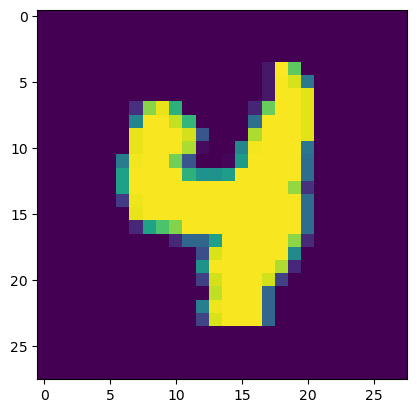

In [47]:
plt.imshow(images[1].squeeze().numpy())